# Spaceship Titanic Kaggle Challenge

## 1. Import dependencies and load data

### 1.1 Install dependencies

In [59]:
%%capture

! pip install pandas
! pip install numpy
! pip install matplotlib


# this code is only necessary for Mac M1 Chip
! pip install tensorflow-macos
! pip install tensorflow-metal

### 1.2 Import dependencies

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

### 1.3 Load the data

In [8]:
train = pd.read_csv("./spaceship-titanic/train.csv")
test = pd.read_csv("./spaceship-titanic/test.csv")

## 2. Analyze the dataset

### 2.1 Description of the dataset

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
9. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
10. **Name** - The first and last names of the passenger.
11. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. Same columns as train.csv.


In [14]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [34]:
# Show description of all numeric features
train.describe(include=float).applymap(lambda x: f"{x:0.2f}") # Round to 2 decimals

# Interesting: .applymap() applies function elementwise, so to every element of DF

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [26]:
# Show all categorical and boolean features
train.describe(include=[object, bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


### 2.2 Analyze each column and its influence on the target variable

#### 2.2.1 PassengerID 

In [53]:
print(f"The train dataset contains {len(train)} records of passengers.")

The train dataset contains 8693 records of passengers.


In [40]:
train.PassengerId.value_counts().max()

# Every PassengerID is unique

1

In [52]:
train.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

**Findings:** 
- Since there are 8693 passengers, and the ID starts from 1 and increases the count, some numbers have been skipped. Why? TO DO!
- What is the meaning of "_01" and "_02" in the end of the ID? Possible new feature? TO DO!

**Analyze the first part of number**

   n_occ  index
0      1   4805
1      2    841
2      3    340
3      4    103
4      5     53
5      6     29
6      7     33
7      8     13


<AxesSubplot:xlabel='n_occ'>

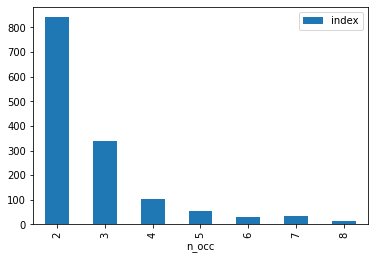

In [130]:
num_how_often = train.PassengerId.str.split("_", expand=True)[0].value_counts()

num_how_often = num_how_often.to_frame(name="n_occ").reset_index(level=0).groupby("n_occ").count().reset_index(level=0)

print(num_how_often)

num_how_often[(num_how_often.n_occ > 1)].plot(x="n_occ", y="index", kind="bar", legend=True)

**Analyze the second part of number**

In [132]:
train.PassengerId.str.split("_", expand=True)[1].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: 1, dtype: int64

<AxesSubplot:xlabel='Ending number PassengerId'>

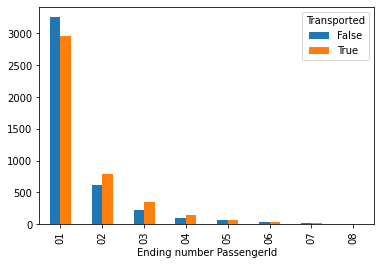

In [197]:
# Since it only consits of numbers from 1 to 8, we will transform this to a numeric or categorical new feature
# Maybe related to VIP status or special tickets?

# Check ratio of Transported/Not Transported for each ending number
end_num_trans = pd.concat([train.PassengerId.str.split("_", expand=True)[1], train.Transported], axis=1) \
                    .groupby(1) \
                    .value_counts("Transported") \
                    .reset_index() \
                    .pivot_table(index=1, columns="Transported", values=0) \
                    .transpose() 

end_num_trans.plot(kind="bar", xlabel="Ending number PassengerId")

# Only slight tendencies

**Decide on preprocessing of variable**

In [207]:
def preprocess_PassengerId(data):
    # Just return splitted column
    new_ID = data.PassengerId.str.split("_", expand=True)
    new_ID.columns = ["PassID_B", "PassID_E"]
    new_ID.PassID_E = new_ID.PassID_E.str[1]
    return new_ID

preprocess_PassengerId(train)

,PassID_B,PassID_E
0,0001,1
1,0002,1
2,0003,1
3,0003,2
4,0004,1
...,...,...
8688,9276,1
8689,9278,1
8690,9279,1
8691,9280,1


#### 2.2.2 HomePlanet

#### 2.2.3 CryoSleep

#### 2.2.4 Cabin

#### 2.2.5 Destination

#### 2.2.6 Age

#### 2.2.7 VIP

#### 2.2.8 RoomService

#### 2.2.9. FoodCourt

#### 2.2.10 ShoppingMall

#### 2.2.11 Spa

#### 2.2.12 VRDeck

#### 2.2.13 Name

#### 2.2.14 Transported - Target Variable

### 2.3 Check for NaN-values

In [49]:
len(train)

8693

In [48]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## 3. Preprocess the data

## 4. Engineer models and predict target variable